In [ ]:
######################################################################################
#  RUT-SOM-DATA-PT-06-2020-U-C                                          Douglas High #
#   Machine-Learning-Challenge                                      November 7, 2020 #
#      > model4.ipynb                                                               #
#   - knn
######################################################################################

In [ ]:
#############################################################################
#00.UI     Update/Install                                                   #
#    a- install/check for update sklearn (to prevent version mismatches).   #
#    b- install joblib - used to save model (uncomment to install).         #
#       *** Restart Kernal after joblib install ***                         #
#############################################################################

#a
!pip install sklearn --upgrade

#b
# !pip install joblib

In [8]:
###########################
#00   I/O                 #
#   - import libraries.   #
#   - associate files.    #
###########################

import pandas as pd
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt


data_in = "../data_in/exoplanet_data.csv"

In [2]:
###################################################
#10     Read and remove                           #
#   - read data into df.                          #
#   - drop null columns if all values are null.   #
#   - drop null rows.                             #
###################################################

df = pd.read_csv(data_in)

df = df.dropna(axis='columns', how='all')

df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
##############################################################################
#20     Split data                                                           #
#   - split data to work with known results (confirmed or false positive).   #
#      saving candidate records for predictions.                             #
##############################################################################

known_df = df[df["koi_disposition"] != "CANDIDATE"]
unknown_df = df[df["koi_disposition"] == "CANDIDATE"]

unknown_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
29,CANDIDATE,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
47,CANDIDATE,0,0,0,0,40.419504,1.139000e-04,-1.139000e-04,173.564690,0.002220,...,-163,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
50,CANDIDATE,0,0,0,0,7.240661,1.620000e-05,-1.620000e-05,137.755450,0.002000,...,-79,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
51,CANDIDATE,0,0,0,0,3.435916,4.730000e-05,-4.730000e-05,132.662400,0.011000,...,-115,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
59,CANDIDATE,0,0,0,0,1.626630,1.020000e-06,-1.020000e-06,169.820171,0.000487,...,-172,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,CANDIDATE,0,0,0,0,4.736816,1.470000e-04,-1.470000e-04,131.787600,0.025600,...,-201,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
6980,CANDIDATE,0,0,0,0,130.235324,3.030000e-03,-3.030000e-03,218.271900,0.020100,...,-183,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
6984,CANDIDATE,0,0,0,0,8.870416,9.020000e-06,-9.020000e-06,137.481093,0.000869,...,-181,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
6985,CANDIDATE,0,0,0,0,47.109631,1.940000e-04,-1.940000e-04,144.131720,0.003430,...,-159,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731


# Select your features (columns)

In [4]:
################################################
#20     Set Features                           #
#   - select columns to use as features.       #
#     (This will also be used as your x values)#
################################################

# feature_names = data.columns


X = known_df.drop("koi_disposition", axis=1)
y = known_df["koi_disposition"]

y = pd.get_dummies(y)
y = y.drop("FALSE POSITIVE", axis=1)
y

,CONFIRMED
0,1
1,0
2,0
3,1
4,1
...,...
6983,0
6986,0
6987,0
6989,0


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
################################################
#30     Test/train split                        #
#   - 
################################################


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
################################################
#40     Scale                        #
#   - 
################################################

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

k: 1, Train/Test Score: 1.000/0.977
k: 3, Train/Test Score: 0.992/0.977
k: 5, Train/Test Score: 0.990/0.979
k: 7, Train/Test Score: 0.988/0.977
k: 9, Train/Test Score: 0.987/0.976
k: 11, Train/Test Score: 0.986/0.977
k: 13, Train/Test Score: 0.984/0.978
k: 15, Train/Test Score: 0.981/0.976
k: 17, Train/Test Score: 0.980/0.977
k: 19, Train/Test Score: 0.979/0.976
k: 21, Train/Test Score: 0.979/0.975
k: 23, Train/Test Score: 0.977/0.974
k: 25, Train/Test Score: 0.976/0.974
k: 27, Train/Test Score: 0.975/0.974
k: 29, Train/Test Score: 0.974/0.974
k: 31, Train/Test Score: 0.974/0.974
k: 33, Train/Test Score: 0.973/0.973
k: 35, Train/Test Score: 0.972/0.973
k: 37, Train/Test Score: 0.971/0.973
k: 39, Train/Test Score: 0.969/0.973
k: 41, Train/Test Score: 0.969/0.972
k: 43, Train/Test Score: 0.969/0.971
k: 45, Train/Test Score: 0.968/0.971
k: 47, Train/Test Score: 0.967/0.971
k: 49, Train/Test Score: 0.967/0.969
k: 51, Train/Test Score: 0.966/0.970
k: 53, Train/Test Score: 0.966/0.970
k: 55,

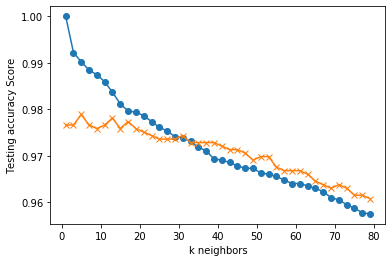

In [10]:
################################################
#50    tree        scaled     #
#   a- fit,predict
#   b- evaluate
################################################

from sklearn.neighbors import KNeighborsClassifier
#a 
train_scores = []
test_scores = []
for k in range(1, 80, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 80, 2), train_scores, marker='o')
plt.plot(range(1, 80, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# #b
# from sklearn.metrics import mean_squared_error

# # MSE = mean_squared_error(y_test, predictions)
# r2 = clf.score(X_test_scaled, y_test)

# print(f" R2: {r2}")

# print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

In [12]:
################################################
#55    tree      No  scaled     #
#   a- fit,predict
#   b- evaluate
################################################

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

#b
from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test, predictions)
r2 = knn.score(X_test, y_test)

print(f" R2: {r2}")
# print(f"MSE: {MSE}, R2: {r2}")

print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

k=19 Test Acc: 0.976
 R2: 0.6598793363499246
Training Data Score: 0.6608848667672197
Testing Data Score: 0.6598793363499246


# Train the Model



In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)